In [291]:
import random
import time
from matplotlib import pyplot as plt
from collections import defaultdict

In [292]:
class BinaryTreeNode:

    def __init__(self, key, value, parent=None):
        self.key = key
        self.value = value
        self.lc = None
        self.rc = None
        self.parent = parent
        self.height = 1
    
    def __repr__(self):
        return f"Key: {self.key}, Value: {self.value} "
    
    def setParent(self, parent):
        self.parent = parent


    def getDepth(self):
        depth = 0
        cur = self
        while cur.parent != None:
            cur = cur.parent
            depth += 1
        return depth

    def setLC(self, node):
        self.lc = node
        if node != None:
            node.setParent(self)
    
    def setRC(self, node):
        self.rc = node
        if node != None:
            node.setParent(self)
    
    def getValue(self):
        return self.value
    
    def hasParent(self):
        #True if self.parent != None else False
        if self.parent == None:
            return False
        return True
    
    def hasChildren(self):
        if self.rc == None and self.lc == None:
            return False
        return True
    
    def replaceChild(self, newChild):
        if(newChild.key < self.key):
            self.lc = newChild
        else:
            self.rc = newChild
        newChild.setParent(self)

In [293]:
class BSTRee:
    def __init__(self, key, value):
        self.root = BinaryTreeNode(key, value)
        self.allNodes = {key: self.root}
        self.allHeights = defaultdict(lambda: 0)
    
    def clear(self):
        self.root = None
        self.allNodes = {}
    
    def setRoot(self, root):
        self.root = root
        root.parent = None
    
    def add(self, key, value):
        newNode = BinaryTreeNode(key, value)
        self.allNodes[key] = newNode

        if self.root == None:
            self.root = newNode
            return newNode
        
        if self.root.key == key:
            newNode.lc = self.root.lc
            newNode.rc = self.root.rc
            self.setRoot(newNode)
            self.setParentHeights(newNode)
            return newNode

        curNode = self.root
        while curNode.hasChildren():
            #if key matches a key already inserted
            if key == curNode.key:
                newNode.lc = curNode.lc
                newNode.rc = curNode.rc
                newNode.setParent(curNode.parent)
                curNode.parent.replaceChild(newNode)
                self.setParentHeights(newNode)
                return newNode
            parent = curNode

            if key > curNode.key:
                curNode = curNode.rc
            else:
                curNode = curNode.lc
            
            if curNode == None:
                parent.replaceChild(newNode)
                self.setParentHeights(newNode)
                return newNode
        curNode.replaceChild(newNode)
        self.setParentHeights(newNode)
        return newNode


    def isRoot(self, node):
        return self.root.key == node.key
    
    
    def resetNode(self, oldNode, newNode):
        """
        if oldNode is root, replace root with new node
        otherwise, change old node's child from old node to new node
        """
        if self.isRoot(oldNode):
            self.setRoot(newNode)
            return 
        oldNode.parent.replaceChild(newNode)
    
    def setParentHeights(self, node):
        while node:
            

            node.height = 1 + max(self.height(node.lc), self.height(node.rc))
            if node.key == self.root.key:
                return
            node = node.parent

    
    

    def removeNode(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        
        if self.size() == 1:
            self.root = None
            return self.allNodes.pop(key)

        removedNode = self.allNodes[key]

        #case 1: if node has no children
        if not removedNode.hasChildren():
            removedNode.parent.replaceChild(removedNode)
            return self.allNodes.pop(key)
        
        #case 3: if node has 2 children
        if removedNode.lc != None and removedNode.rc != None:
            successor = self.getSuccessor(removedNode)
            
            self.resetNode(removedNode, successor)
            self.allNodes[successor.key] = successor
            return self.allNodes.pop(key)
        
        #case 2: if node has 1 child
        #subcase 1: 1 left child
        if removedNode.lc != None:
            self.resetNode(removedNode, removedNode.lc)
            removedNode.lc = None
            return self.allNodes.pop(key)
        
        #subcase 2: 1 right child
        if removedNode.rc != None:
            self.resetNode(removedNode, removedNode.rc)
            removedNode.rc = None
            return self.allNodes.pop(key)
        
    

    def remove(self, key):
        isRoot = self.root.key == key
        removed = self.removeNode(key)
        
        if isRoot:
            self.rotate(self.root)
        else:
            self.rotate(removed.parent)
        

        for node in self.allNodes.values():
            node.setDepth()


    
    def getSuccessor(self, targetNode):

        successor = targetNode.rc
        while successor.lc != None:
            successor = successor.lc
        
        successor =  self.removeNode(successor.key)
        successor.lc = targetNode.lc
        successor.rc = targetNode.rc
        successor.lc.parent = successor
        successor.rc.parent = successor
        return successor

    
    def setHeights(self):
        nodeStack = [self.root]
        nodesBottom2Top = []
        while len(nodeStack) != 0:
            newNode = nodeStack.pop(0)
            if newNode == None:
                continue
            nodeStack.append(newNode.lc)
            nodeStack.append(newNode.rc)
            nodesBottom2Top.append(newNode)

        
        while nodesBottom2Top:
            curNode = nodesBottom2Top.pop()
            if not curNode.hasChildren():
                self.allHeights[curNode] = 1
                continue
            self.allHeights[curNode] = max(
                self.allHeights[curNode.lc],
                self.allHeights[curNode.rc]
            ) + 1
            


        return self.allHeights
            
    
    def getBF(self, node):
        """
        get the balance factor of a given node
        """
        return self.height(node.lc) - self.height(node.rc)
    
    def size(self):
        return len(self.allNodes)

    def hasKey(self, key):
        return True if key in self.allNodes else False
    
    def quickGet(self, key):
        if not self.hasKey(key):
            raise Exception(f"Key not found: {key}")
        return self.allNodes[key].getValue()
    
    def get(self, key, rootnode=None):
        if rootnode == None:
            rootnode = self.root
        if key == rootnode.key:
            return rootnode.getValue()
        
        if key > rootnode.key:
            rootnode = rootnode.rc
        elif key < rootnode.key:
            rootnode = rootnode.lc
        
        if rootnode == None:
            raise Exception(f"Key not found: {key}")
        
        return self.get(key, rootnode=rootnode)
    
    def getBlnceCase(self, node):
        bf = self.getBF(node)
        if -1 <= bf <= 1:
            return "Node is balanced"
        
        case = ""

        if bf > 1:
            case += 'L'
            bf = self.getBF(node.lc)
        elif bf < -1: 
            case += 'R'
            bf = self.getBF(node.rc)
        
        if bf > 0:
            case += 'L'
        elif bf < 0: 
            case += 'R'
        
        return case
    
    def avlAdd(self, key, value):
        newNode =self.add(key, value)
        #self.setHeights()
        self.rotate(newNode)

    def rotate(self, curNode):
        while curNode.hasParent():
            curNode = curNode.parent
            bf = self.getBF(curNode)
            if bf > 1 or bf < -1:
                break

        if -1 <= self.getBF(curNode) <= 1:
            return
        case =  self.getBlnceCase(curNode)

        match case:
            case 'LL':
                self.rightRotate(curNode)
                return
            case 'RR':
                self.leftRotate(curNode)
                return
            case 'LR':
                self.leftRotate(curNode.lc)
                self.rightRotate(curNode)
                return
            case 'RL':
                self.rightRotate(curNode.rc)
                self.leftRotate(curNode)
                return
            case _:
                return
    def height(self, node):
        if not node:
            return 0
        return node.height
            
    def rightRotate(self, current):
        #put child where current used to be
        #case 1: current is root
        child = current.lc
        if self.root == current:
            self.setRoot(child)
        else:
            current.parent.replaceChild(child)

        #temporarily remove child.rc and save it as old_right
        old_right = child.rc

        #child.rc = current
        child.setRC(current)

        #child.right_child.left_child = old_right
        child.rc.setLC(old_right)
        child.height = 1 + max(self.height(child.lc), self.height(child.rc))
        current.height = 1 + max(self.height(current.lc), self.height(current.rc))

    def leftRotate(self, current):
        child = current.rc
        if self.root.key == current.key:
            self.setRoot(child)
        else:
            current.parent.replaceChild(child)
        
        old_left = child.lc

        child.setLC(current)

        current.setRC(old_left)
        child.height = 1 + max(self.height(child.lc), self.height(child.rc))
        current.height = 1 + max(self.height(current.lc), self.height(current.rc))



            



    



In [294]:
from collections import deque

def print_bst_visual(tree):
    if not tree.root:
        print("The tree is empty.")
        return

    # Queue for level-order traversal
    queue = deque([(tree.root, 0)])  # (node, level)
    current_level = 0
    level_nodes = []

    while queue:
        node, level = queue.popleft()

        # If we move to a new level, print the previous level
        if level != current_level:
            print("Level", current_level, ":", " ".join(level_nodes))
            level_nodes = []
            current_level = level

        # Add the current node's key to the level's list
        level_nodes.append(str(node.key))

        # Add children to the queue
        if node.lc:
            queue.append((node.lc, level + 1))
        if node.rc:
            queue.append((node.rc, level + 1))

    # Print the last level
    if level_nodes:
        print("Level", current_level, ":", " ".join(level_nodes))



In [295]:
# Example usage
myTree = BSTRee(10, 10)
numbers = [8,9,11,12,1,3,2,13,]
for number in numbers:
    myTree.avlAdd(number, number)
print(myTree.allNodes)
print_bst_visual(myTree)
myTree.setHeights()
print(myTree.getBF(myTree.allNodes[10]))
print(myTree.allNodes[11].rc)

{10: Key: 10, Value: 10 , 8: Key: 8, Value: 8 , 9: Key: 9, Value: 9 , 11: Key: 11, Value: 11 , 12: Key: 12, Value: 12 , 1: Key: 1, Value: 1 , 3: Key: 3, Value: 3 , 2: Key: 2, Value: 2 , 13: Key: 13, Value: 13 }
Level 0 : 9
Level 1 : 3 11
Level 2 : 1 8 10 12
Level 3 : 2 13
0
Key: 12, Value: 12 


In [296]:
def generateRandomKeyList(len, max):
    return [random.randint(0, max) for _ in range(len)]

In [ ]:
def avgInsertionTime(tree, items):
    tree.clear()
    times = [None] * (len(items))
    for idx, item in enumerate(items):
        start = time.time()
        tree.add(item, 1)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

def avgRetrievalTime(tree, items):
    times = [None] * len(items)
    for idx, item in enumerate(items):
        start = time.time()
        tree.get(item)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

In [303]:

#testing
items =  generateRandomKeyList(553, 5000)
avgSortedInsertionTime = [None] * len(items)
avgUnsortedInsertionTime = [None] * len(items)
avgSortedRetrievalTime = [None] * len(items)
tree = BSTRee(-1, -1)
avgInsertionTime(tree, items)
avgUnsortedRetrievalTime = [None] * len(items)
# for i in range(1, len(items)):
#     keys = items[:i]
#     tree = BSTRee(-1, -1)
#     avgUnsortedInsertionTime[i] = avgInsertionTime(tree, keys)
#     # avgUnsortedRetrievalTime[i] = avgRetrievalTime(tree, keys)
#     # keys.sort()
#     # avgSortedInsertionTime[i] = avgInsertionTime(tree, keys)
#     # avgSortedRetrievalTime[i] = avgRetrievalTime(tree, keys)

KeyboardInterrupt: 

In [301]:
print_bst_visual(tree)

Level 0 : 2462
Level 1 : 1368 4409
Level 2 : 567 1756 3405 4678
Level 3 : 220 955 1618 2185 2787 4017 4530 4865
Level 4 : 125 405 835 1195 1450 1729 1942 2324 2690 2906 3708 4279 4487 4609 4749 4930
Level 5 : 33 170 289 425 677 859 1043 1242 1409 1536 1681 1746 1892 2084 2262 2397 2610 2724 2870 3115 3576 3809 4213 4358 4478 4495 4563 4627 4688 4811 4890 4949
Level 6 : 19 88 158 199 254 374 415 516 640 752 846 895 1009 1097 1225 1299 1395 1425 1505 1580 1651 1692 1745 1753 1787 1914 2045 2157 2235 2301 2363 2417 2570 2656 2720 2756 2819 2890 2986 3223 3497 3643 3718 3954 4144 4230 4324 4400 4454 4483 4489 4521 4534 4601 4624 4645 4685 4736 4784 4847 4880 4909 4940 4974
Level 7 : 4 26 57 111 136 167 187 217 233 284 301 392 414 415 470 541 608 658 699 766 838 856 887 915 998 1023 1082 1149 1201 1235 1287 1314 1393 1399 1411 1434 1481 1520 1561 1590 1630 1656 1687 1724 1759 1822 1903 1929 1991 2067 2112 2164 2203 2247 2267 2306 2334 2389 2416 2422 2529 2582 2642 2683 2701 2720 2745 2767 2

In [ ]:
def avgInsertionTime(tree, items):
    tree.clear()
    times = [None] * (len(items))
    for idx, item in enumerate(items):
        start = time.time()
        tree.add(item, 1)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)
avgInsertionTime(tree, items)
print_bst_visual(tree)

Level 0 : 1692
Level 1 : 1119 3806
Level 2 : 93 1154 1944 4669
Level 3 : 3 971 1144 1383 1703 3479 4130 4990
Level 4 : 11 235 1093 1172 1488 1802 2144 3575 3810 4224 4809 4994
Level 5 : 8 40 185 536 1082 1103 1296 1456 1544 1797 1824 1974 3461 3530 3759 3807 3989 4211 4429 4676 4931
Level 6 : 35 44 142 189 282 804 1019 1112 1190 1359 1428 1471 1538 1646 1792 1799 1816 1915 1970 2084 2273 3525 3562 3649 3785 3962 4002 4198 4218 4406 4460 4771 4866 4981
Level 7 : 14 71 138 153 192 247 406 586 847 982 1038 1117 1180 1243 1328 1423 1452 1459 1477 1489 1543 1639 1646 1778 1803 1820 1858 1929 1970 2043 2086 2199 3348 3520 3534 3566 3610 3703 3761 3791 3906 3965 3996 4053 4195 4201 4220 4286 4426 4446 4555 4727 4808 4929 4951
Level 8 : 23 57 80 107 149 155 197 278 327 470 557 643 820 945 972 987 1031 1071 1181 1196 1287 1319 1355 1415 1441 1458 1467 1532 1566 1685 1721 1821 1855 1886 2021 2076 2095 2145 2210 2560 3364 3504 3522 3531 3535 3571 3582 3625 3691 3707 3801 3879 3943 3988 4029 4078 

Text(0.5, 1.0, 'Average Unsorted Insertion Time')

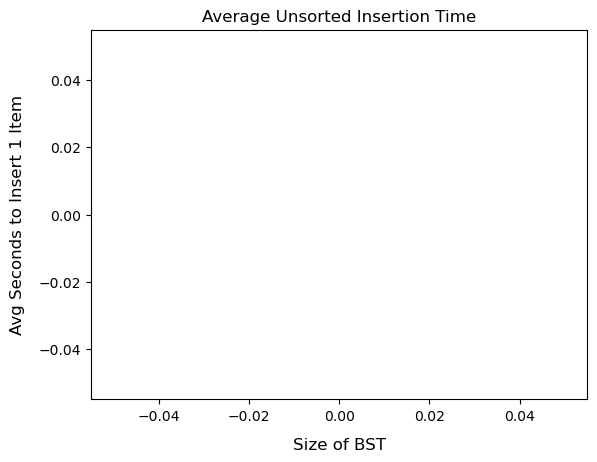

In [ ]:
plt.plot(avgUnsortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Insertion Time")

Text(0.5, 1.0, 'Average Unsorted Retrieval Time')

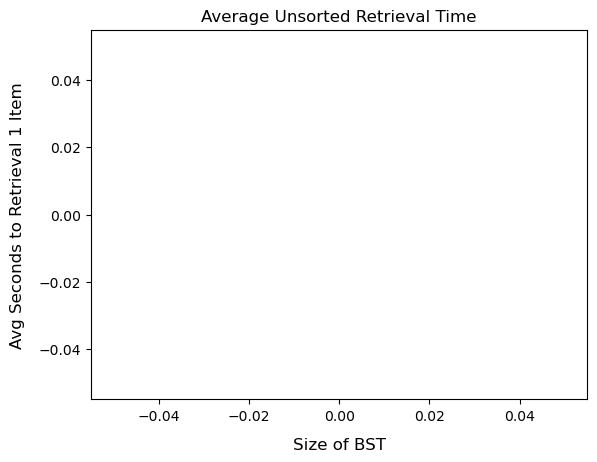

In [ ]:
plt.plot(avgUnsortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieval 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Retrieval Time")

Text(0.5, 1.0, 'Avg Sorted Insertion Time')

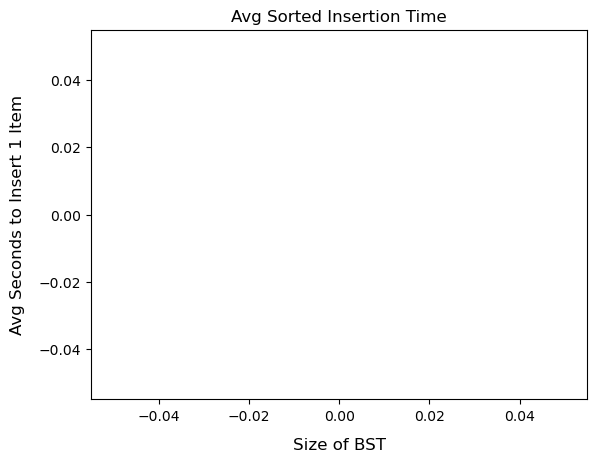

In [ ]:
plt.plot(avgSortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Insertion Time")

Text(0.5, 1.0, 'Avg Sorted Retrieval Time')

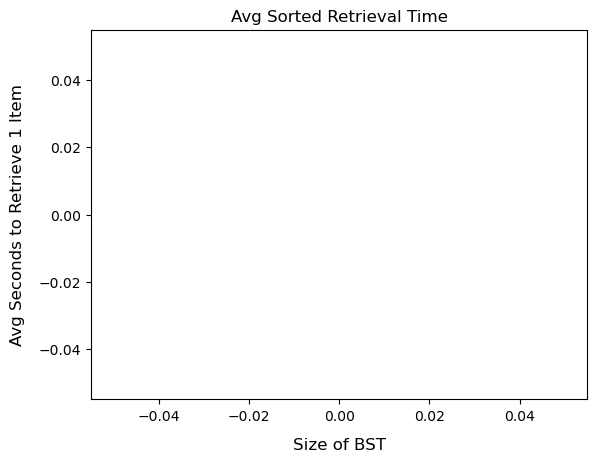

In [ ]:
plt.plot(avgSortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Retrieval Time")